In [1]:
import pandas as pd
import numpy as np

from mpl_toolkits.basemap import Basemap, cm
import matplotlib.pyplot as plt
import sys

import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import pickle

In [2]:
from glob import glob

station_names = [file.split("/")[-1][:5] for file in glob("./dl_models/*.pkl")]

In [3]:
stations_df = pd.read_csv("../2015-2020-pm25/india_stations-corrected.csv", index_col=0)
mumbai_stations_df = stations_df.loc[stations_df['StationId'].isin(station_names)]
mumbai_stations_df

,StationName,StationId,City,Latitude,Longitude
89,"Borivali East, Mumbai - MPCB",MH006,Mumbai,19.229800,72.860900
90,"Chhatrapati Shivaji Intl. Airport (T2), Mumbai...",MH007,Mumbai,19.089560,72.865614
91,"Colaba, Mumbai - MPCB",MH008,Mumbai,18.906700,72.814700
92,"Kurla, Mumbai - MPCB",MH009,Mumbai,19.080000,72.915511
93,"Powai, Mumbai - MPCB",MH010,Mumbai,19.125000,72.906000
94,"Sion, Mumbai - MPCB",MH011,Mumbai,19.028000,72.861900
95,"Vasai West, Mumbai - MPCB",MH012,Mumbai,19.330105,72.814971
96,"Vile Parle West, Mumbai - MPCB",MH013,Mumbai,19.110000,72.839720
97,"Worli, Mumbai - MPCB",MH014,Mumbai,18.998600,72.817400


In [4]:
station_names = mumbai_stations_df['StationName'].values
lat, lon = mumbai_stations_df['Latitude'].values, mumbai_stations_df['Longitude'].values

In [5]:
pkl_obj = pickle.load(open("mumbai_geodata.pkl", "rb"))
MUMBAI_B_MIN_LON, MUMBAI_B_MAX_LON = pkl_obj['min_lon'], pkl_obj['max_lon']
MUMBAI_B_MIN_LAT, MUMBAI_B_MAX_LAT = pkl_obj['min_lat'], pkl_obj['max_lat']
boundary = pkl_obj['boundary']
mask = pkl_obj['mumbai_mask']

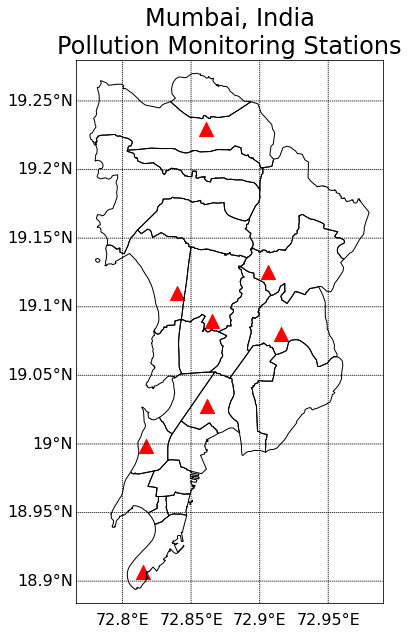

In [6]:
fig = plt.figure(figsize=(20, 10))
ax  = fig.gca()
    
pad = 0.01

m = Basemap(projection='cyl', resolution='l', llcrnrlat=MUMBAI_B_MIN_LAT-pad, urcrnrlat=MUMBAI_B_MAX_LAT+pad, llcrnrlon=MUMBAI_B_MIN_LON-pad, urcrnrlon=MUMBAI_B_MAX_LON+pad , suppress_ticks=True)

m.readshapefile("../Municipal_Spatial_Data/Mumbai/Mumbai",'Mumbai', linewidth=1)

m.drawparallels(np.arange(-90., 120., 0.05), labels=[1, 0, 0, 0], fontsize=16)
m.drawmeridians(np.arange(-180., 181., 0.05), labels=[0, 0, 0, 1],  fontsize=16)

X, Y = m(lon, lat)
ax.scatter(X, Y, c='r', s=200, marker="^")

# for i, (x, y) in enumerate(zip(X, Y)):
#     ax.annotate(station_names[i], (x,y), xytext=(5, 5), fontsize=10, textcoords='offset points')


plt.title('Mumbai, India\nPollution Monitoring Stations', fontsize=24)

plt.show()
pngfile = 'Mumbai_Stations.png'
fig.savefig(pngfile, bbox_inches="tight", dpi=400)